In [13]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#from LIM import utils as ut
from LIM.neural_networks import utilities as ut
from LIM.neural_networks.models import LIM_class
from LIM.neural_networks.utilities import *
import torch
#plt.style.use("./plotting.mplstyle")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<xarray.DataArray (eof: 30, time: 132001)>
[3960030 values with dtype=float64]
Coordinates:
  * eof      (eof) int32 0 1 2 3 4 5 6 7 8 9 ... 20 21 22 23 24 25 26 27 28 29
  * time     (time) object 0001-12-31 12:00:00 ... 11001-12-31 12:00:00 <class 'xarray.core.dataarray.DataArray'>


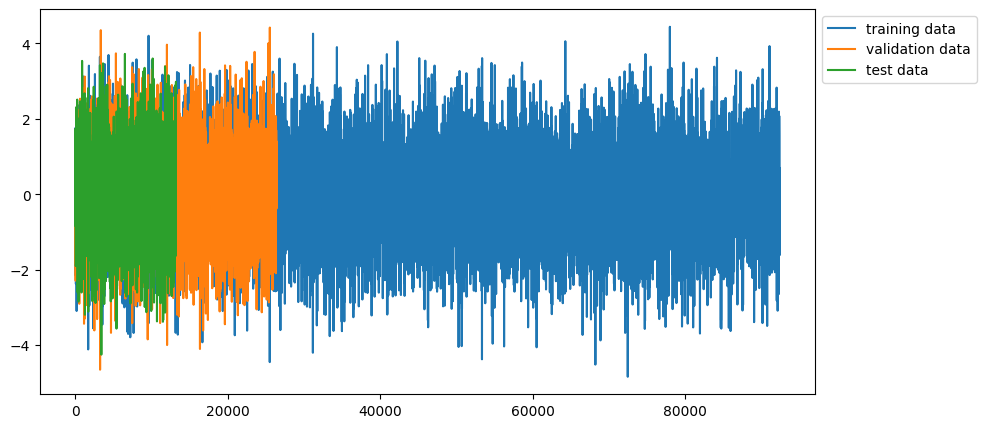

In [14]:
data = xr.open_dataarray("lim_integration_xarray_130k[-1]q.nc")

print(data, type(data))

idx_train = int(len(data['time']) * 0.7)
idx_val = int(len(data['time']) * 0.2)

train_data = data[: :,  :idx_train]
val_data = data[: :, idx_train: idx_train+idx_val]
test_data = data[: :, idx_train+idx_val: ]

train_datan = train_data.data
val_datan = val_data.data
test_datan = test_data.data

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_datan[0, :], label='training data')
ax.plot(val_datan[0, :], label='validation data')
ax.plot(test_datan[0, :], label='test data')
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()




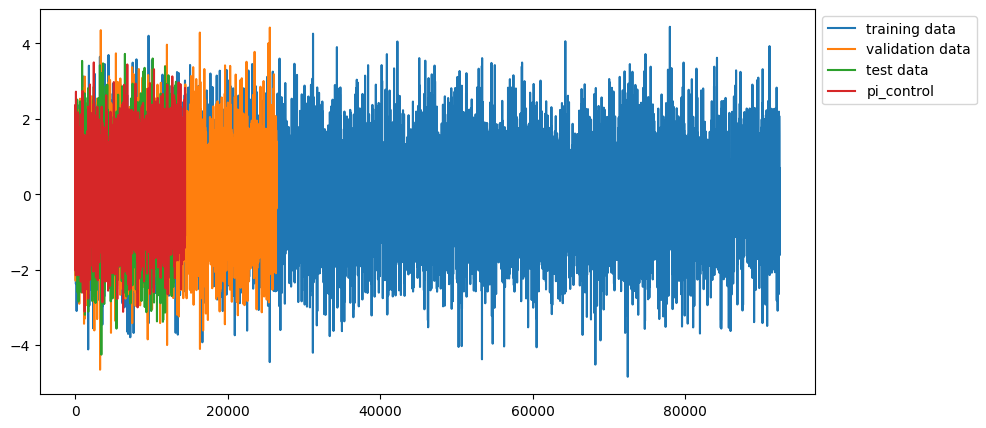

In [15]:
data = torch.load("lim_integration_130k[-1].pt")
data_control = torch.load("data_piControl.pt")
data_control = normalize_data(data_control)


idx_train = int(len(data[0, :]) * 0.7)
idx_val = int(len(data[0, :]) * 0.2)

train_data = data[:, :idx_train]
val_data = data[:, idx_train: idx_train+idx_val]
test_data = data[:, idx_train+idx_val: ]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_datan[0, :], label='training data')
ax.plot(val_datan[0, :], label='validation data')
ax.plot(test_datan[0, :], label='test data')
ax.plot(data_control[0, :], label="pi_control")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()
